In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('assists-data-02.csv')
print(df.shape)
df.head()

(22954, 32)


,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,...,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,...,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,...,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,...,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,...,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [3]:
df['Year'].describe()

count    22954.000000
mean      1991.644724
std         18.913354
min       1947.000000
25%       1977.000000
50%       1994.000000
75%       2008.000000
max       2019.000000
Name: Year, dtype: float64

In [7]:
df2 = df[df['Year'] > 1995]
df2 = df2.reset_index(drop=True)
df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         39
3P           0
3PA          0
3P%       1693
2P           0
2PA          0
2P%         67
eFG%        39
FT           0
FTA          0
FT%        382
ORB          0
DRB          0
TRB          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
AST          0
Target    2170
dtype: int64

In [8]:
df2 = df2.fillna(0)
df2.isnull().sum()

Player    0
Year      0
Lge       0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
AST       0
Target    0
dtype: int64

In [11]:
CAS = []

for i in range(len(df2)):
    career_assists = []
    for j in range(25):
        if i-j < 0:
            continue
        elif df2.loc[i, 'Player'] != df2.loc[i-j, 'Player']:
            continue
        else:
            career_assists.append(df2.loc[i-j, 'AST'])
    CAS.append(np.mean(career_assists))
    
Season = []

for i in range(len(df2)):
    if i==0:
        Season.append(1)
    elif df2.loc[i, 'Player'] == df2.loc[i-1, 'Player']:
        Season.append(Season[i-1] + 1)
    else:
        Season.append(1)
        
df2['CAS'] = CAS
df2['Szn'] = Season

df2.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn
0,A.C. Green,1996.0,NBA,SF,32.0,PHO,82.0,36.0,25.8,2.6,...,6.8,0.5,0.3,1.0,1.7,7.5,0.9,0.8,0.900000,1
1,A.C. Green,1997.0,NBA,PF,33.0,DAL,83.0,73.0,30.0,2.8,...,7.9,0.8,0.2,0.9,1.7,7.2,0.8,1.5,0.850000,2
2,A.C. Green,1998.0,NBA,PF,34.0,DAL,82.0,68.0,32.3,3.0,...,8.1,1.0,0.3,0.8,1.9,7.3,1.5,0.5,1.066667,3
3,A.C. Green,1999.0,NBA,PF,35.0,DAL,50.0,35.0,18.5,2.2,...,4.6,0.6,0.2,0.4,1.4,4.9,0.5,1.0,0.925000,4
4,A.C. Green,2000.0,NBA,PF,36.0,LAL,82.0,82.0,23.5,2.1,...,5.9,0.6,0.2,0.6,1.5,5.0,1.0,0.5,0.940000,5


In [12]:
stats = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
         'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST', 'CAS']

for stat in stats:
    df2[f'{stat}_adj'] = df2[stat] * df2['MP']
    
df2.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj
0,A.C. Green,1996.0,NBA,SF,32.0,PHO,82.0,36.0,25.8,2.6,...,51.60,121.26,175.44,12.9,7.74,25.80,43.86,193.50,23.22,23.220000
1,A.C. Green,1997.0,NBA,PF,33.0,DAL,83.0,73.0,30.0,2.8,...,81.00,156.00,237.00,24.0,6.00,27.00,51.00,216.00,24.00,25.500000
2,A.C. Green,1998.0,NBA,PF,34.0,DAL,82.0,68.0,32.3,3.0,...,87.21,177.65,261.63,32.3,9.69,25.84,61.37,235.79,48.45,34.453333
3,A.C. Green,1999.0,NBA,PF,35.0,DAL,50.0,35.0,18.5,2.2,...,29.60,53.65,85.10,11.1,3.70,7.40,25.90,90.65,9.25,17.112500
4,A.C. Green,2000.0,NBA,PF,36.0,LAL,82.0,82.0,23.5,2.1,...,47.00,94.00,138.65,14.1,4.70,14.10,35.25,117.50,23.50,22.090000


In [45]:
pos_encode = {'Pos': {
    'PF': 4, 'C': 5, 'SG': 2, 'SF': 3, 'PG': 1,
    'G': 1.5, 'G-F': 2.5, 'F': 3.5, 'F-C': 4.25, 'F-G': 2.5,
    'C-F': 4.25, 'C-PF': 4.5, 'PG-SG': 1.5, 'SF-SG': 2.5, 'SG-SF': 2.5,
    'PF-C': 4.5, 'PF-SF': 3.5, 'SG-PG': 1.5, 'SF-PF': 3.5, 'SG-PF': 3,
    'PG-SF': 2, 'C-SF': 4, 'SF-PG': 2
}}

df2 = df2.replace(to_replace=pos_encode)

df2['Pos'].value_counts()

4.0    2267
5.0    2258
2.0    2187
1.0    2147
3.0    2028
2.5      47
1.5      47
4.5      44
3.5      35
Name: Pos, dtype: int64

In [15]:
import requests
from bs4 import BeautifulSoup

teams = df['Tm'].value_counts().index
df3 = pd.DataFrame()

for team in teams:
    years = []
    for i in range(len(df)):
        if df.loc[i, 'Tm'] != team:
            continue
        else:
            years.append(int(df.loc[i, 'Year']))
    years = list(set(years))
    for year in years:
        url = f'https://www.basketball-reference.com/teams/{team}/{year}.html'
        stats_page = requests.get(url)
        content = stats_page.content
        soup = BeautifulSoup(content, 'html.parser')
        table = soup.find(name='table', attrs={'id': 'roster'})
        temp1 = pd.read_html(str(table))[0]
        temp2 = pd.DataFrame(temp1['Player']).rename(columns={'Player': f'{team} {year}'})
        
        df3 = pd.concat([df3, temp2], axis=1)
            
df3.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,...,CAP 1974,MNP 1969,TEX 1971,NJA 1968,CHP 1962,MMS 1975,WSA 1970,DNA 1975,AND 1950,MNM 1968
0,Aud Brindley,Carl Braun,Carl Braun,Ed Bartels,Vince Boryla,Vince Boryla,Vince Boryla,Don Ackerman,Don Anielak,Dick Atha,...,Phil Chenier,Dan Anderson,Charles Beasley,Dan Anderson,Walt Bellamy,Roger Brown,Mike Barrett,Byron Beck,Charlie Black,Richard Clark
1,Tommy Byrnes,Tommy Byrnes,Tommy Byrnes,Vince Boryla,Nat Clifton,Nat Clifton,Carl Braun,Jim Baechtold,Jim Baechtold,Jim Baechtold,...,Archie Clark,Frank Card,John Beasley,Johnny Austin,George Bon Salle,George Carter,Rick Barry,Mack Calvin,Frankie Brian,Mel Daniels
2,Bob Cluggish,Leo Gottlieb,Joe Colone,Carl Braun,Ray Ellefson,Harry Gallatin,Dick Bunt,Vince Boryla,Carl Braun,Carl Braun,...,Elvin Hayes,Stephen Chubin,Bob Bedell,Al Beard,Barney Cable,Mel Daniels,Gary Bradds,Mike Green,Jake Carter,Donnie Freeman
3,Bob Fitzgerald,Sonny Hertzberg,Harry Gallatin,Harry Donovan,Harry Gallatin,George Kaftan,Nat Clifton,Carl Braun,Fred Christ,Nat Clifton,...,Tom Kozelko,Connie Hawkins,Ron Boone,Jim Caldwell,Howie Carl,Larry Finch,Larry Brown,Bobby Jones,Bill Closs,Les Hunter
4,Frido Frey,Dick Holub,Gene James,Harry Gallatin,Gene James,Ray Lumpp,Jerry Fleishman,Nat Clifton,Nat Clifton,Walter Dukes,...,Manny Leaks,Art Heyman,Gary Bradds,Art Heyman,Ralph Davis,Stew Johnson,Frank Card,Patrick McFarland,Frank Gates,Ervin Inniger


In [17]:
stats2 = stats.copy()

for stat in stats:
    stats2.append(f'{stat}_adj')

team_stats = pd.DataFrame()

for i in range(len(df3.columns)):
    column = df3.columns[i]
    team_stats.loc[i, 'Year'] = column.split(' ')[1]
    team_stats.loc[i, 'Tm'] = column.split(' ')[0]
    temp1 = pd.DataFrame(df3[column])
    contemporary_year = float(column.split(' ')[1])
    temp1['Year'] = contemporary_year - 1
    temp1.columns = ['Player', 'Year']
    temp2 = temp1.merge(df2, on=['Player', 'Year'], how='left')
    for stat in stats2:
        team_stats.loc[i, f'TM_{stat}'] = np.mean(temp2[stat])
        
team_stats.head()

,Year,Tm,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,...,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,1947,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1949,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1951,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
team_stats['Year'] = team_stats['Year'].astype(float)

df4 = df2.merge(team_stats, on=['Year', 'Tm'], how='left')
df4.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,A.C. Green,1996.0,NBA,3,32.0,PHO,82.0,36.0,25.8,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A.C. Green,1997.0,NBA,4,33.0,DAL,83.0,73.0,30.0,2.8,...,36.799500,76.465000,113.529000,23.344500,14.193000,50.908000,63.767500,335.549000,68.086500,68.086500
2,A.C. Green,1998.0,NBA,4,34.0,DAL,82.0,68.0,32.3,3.0,...,30.047857,71.187857,101.514286,18.188571,12.980000,38.959286,51.848571,235.810714,51.294286,52.306429
3,A.C. Green,1999.0,NBA,4,35.0,DAL,50.0,35.0,18.5,2.2,...,43.168182,92.065455,134.946364,24.129091,18.046364,42.052727,57.067273,278.288182,52.491818,51.696212
4,A.C. Green,2000.0,NBA,4,36.0,LAL,82.0,82.0,23.5,2.1,...,17.440909,55.835455,73.905455,19.064545,10.394545,33.076364,48.637273,218.777273,50.054545,48.745455


In [21]:
df4.isnull().sum()

Player          0
Year            0
Lge             0
Pos             0
Age             0
             ... 
TM_TOV_adj    428
TM_PF_adj     428
TM_PTS_adj    428
TM_AST_adj    428
TM_CAS_adj    428
Length: 103, dtype: int64

In [26]:
from requests_html import HTMLSession, HTML

In [27]:
nba_years = np.arange(1951, 2020, 1)
nba_url = 'https://www.basketball-reference.com/leagues/NBA_{}.html'

df5 = pd.DataFrame()

for year in nba_years:
    if year == 1999:
        continue
    else:
        req_url = nba_url.format(year)
        session = HTMLSession()
        r = session.get(req_url)
        roster = r.html.find('#all_all_star_game_rosters', first=True)
        roster.find('#div_all_star_game_rosters')
        roster = roster.html.split('<!--')[1].split('-->')[0]
        roster = HTML(html=roster)
        teams = roster.find('.data_grid_box')
        data = [{'Player': player.text} for team in teams for player in team.find('.left p')]
        df6 = pd.DataFrame(data)
        df6['Year'] = year
        df6['Lge'] = 'NBA'
    
        df5 = pd.concat([df5, df6])
    
df5.head()

,Player,Year,Lge
0,Paul Arizin*,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy*,1951,NBA
3,Joe Fulks*,1951,NBA
4,Harry Gallatin*,1951,NBA


In [32]:
df5 = df5.reset_index(drop=True)

In [33]:
player_new2 = []

for i in range(len(df5)):
    if '*' in df5.loc[i, 'Player']:
        a = df5.loc[i, 'Player'].split('*')
        player_new2.append(a[0])
    elif '\xa0' in df5.loc[i, 'Player']: 
        a = df5.loc[i, 'Player'].split('\xa0')
        player_new2.append(a[0])
    else:
        player_new2.append(df5.loc[i, 'Player'])
        
df5['Player'] = player_new2
df5.head()

,Player,Year,Lge
0,Paul Arizin,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy,1951,NBA
3,Joe Fulks,1951,NBA
4,Harry Gallatin,1951,NBA


In [34]:
df5 = df5.sort_values(by='Player')
df5 = df5.reset_index(drop=True)

total_selections = []

for i in range(len(df5)):
    if i==0:
        total_selections.append(1)
    elif df5.loc[i, 'Player'] != df5.loc[i-1, 'Player']:
        total_selections.append(1)
    else:
        total_selections.append(total_selections[i-1]+1)
        
df5['Sels'] = total_selections

df5.head()

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1
1,Adrian Dantley,1986,NBA,1
2,Adrian Dantley,1985,NBA,2
3,Adrian Dantley,1984,NBA,3
4,Adrian Dantley,1982,NBA,4


In [47]:
df4 = df4.merge(df5, on=['Player', 'Year', 'Lge'], how='left')

In [48]:
test = df4[df4['Year'] == 2019]
test.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels
31,Aaron Gordon,2019.0,NBA,4,23.0,ORL,78.0,78.0,33.8,6.0,...,80.557500,102.258333,19.840000,11.965000,33.768333,48.170833,264.368333,56.255833,46.034645,NaN
42,Aaron Holiday,2019.0,NBA,1,22.0,IND,50.0,0.0,12.9,2.1,...,77.724000,98.770667,23.122000,10.997333,33.052667,45.211333,281.136667,60.038667,51.608909,NaN
70,Abdel Nader,2019.0,NBA,3,25.0,OKC,61.0,1.0,11.4,1.5,...,75.682143,103.825000,22.044286,9.081429,39.164286,47.000714,272.657143,65.767857,59.281408,NaN
144,Al Horford,2019.0,NBA,5,32.0,BOS,68.0,68.0,29.0,5.7,...,73.970000,92.983333,15.905333,9.110000,29.272000,39.791333,235.256000,50.416000,43.692085,NaN
171,Al-Farouq Aminu,2019.0,NBA,4,28.0,POR,81.0,81.0,28.3,3.2,...,75.706667,99.217333,14.686667,10.374667,30.038000,40.424667,262.468000,44.823333,43.523000,NaN


In [56]:
test.isnull().sum()

Player           0
Year             0
Lge              0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%              0
3P               0
3PA              0
3P%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
AST              0
Target           0
CAS              0
Szn              0
FG_adj           0
FGA_adj          0
FG%_adj          0
3P_adj           0
3PA_adj          0
3P%_adj          0
2P_adj           0
2PA_adj          0
2P%_adj          0
eFG%_adj         0
FT_adj           0
FTA_adj          0
FT%_adj          0
ORB_adj          0
DRB_adj          0
TRB_adj          0
STL_adj          0
BLK_adj          0
TOV_adj     

In [57]:
test = test.fillna(0)
test.isnull().sum()

Player         0
Year           0
Lge            0
Pos            0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
AST            0
Target         0
CAS            0
Szn            0
FG_adj         0
FGA_adj        0
FG%_adj        0
3P_adj         0
3PA_adj        0
3P%_adj        0
2P_adj         0
2PA_adj        0
2P%_adj        0
eFG%_adj       0
FT_adj         0
FTA_adj        0
FT%_adj        0
ORB_adj        0
DRB_adj        0
TRB_adj        0
STL_adj        0
BLK_adj        0
TOV_adj        0
PF_adj         0
PTS_adj        0
AST_adj        0
CAS_adj        0
TM_FG          0
TM_FGA        

In [10]:
train = pd.read_csv('assists-data-05.csv')

non_features = ['Player', 'Tm', 'Target']
X_train = train.drop(non_features, axis=1)
y_train = train['Target']

X_test = test.drop(non_features, axis=1)

In [11]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [12]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=431)

model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

test['preds'] = y_pred

test.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels,preds
0,Aaron Gordon,2019.0,NBA,4.0,23.0,ORL,78.0,78.0,33.8,6.0,...,102.258333,19.840000,11.965000,33.768333,48.170833,264.368333,56.255833,46.034645,0.0,3.185556
1,Aaron Holiday,2019.0,NBA,1.0,22.0,IND,50.0,0.0,12.9,2.1,...,98.770667,23.122000,10.997333,33.052667,45.211333,281.136667,60.038667,51.608909,0.0,2.156699
2,Abdel Nader,2019.0,NBA,3.0,25.0,OKC,61.0,1.0,11.4,1.5,...,103.825000,22.044286,9.081429,39.164286,47.000714,272.657143,65.767857,59.281408,0.0,0.713409
3,Al Horford,2019.0,NBA,5.0,32.0,BOS,68.0,68.0,29.0,5.7,...,92.983333,15.905333,9.110000,29.272000,39.791333,235.256000,50.416000,43.692085,0.0,3.177178
4,Al-Farouq Aminu,2019.0,NBA,4.0,28.0,POR,81.0,81.0,28.3,3.2,...,99.217333,14.686667,10.374667,30.038000,40.424667,262.468000,44.823333,43.523000,0.0,1.223251


In [61]:
test = test.reset_index(drop=True)
test.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels,preds
0,Aaron Gordon,2019.0,NBA,4.0,23.0,ORL,78.0,78.0,33.8,6.0,13.4,0.449,1.6,4.4,0.349,4.5,9.0,0.499,0.507,2.4,3.2,0.731,1.7,5.7,7.4,0.7,0.7,2.1,2.2,16.0,3.7,0.0,2.040000,5,202.80,452.92,15.1762,54.08,148.72,11.7962,152.10,304.20,16.8662,17.1366,81.12,108.16,24.7078,57.46,192.66,250.12,23.66,23.66,70.98,74.36,540.80,125.06,68.952000,3.666667,8.316667,0.435250,0.950000,2.766667,0.296917,2.708333,5.566667,0.477583,0.486167,1.616667,2.083333,0.772833,0.891667,3.133333,4.041667,0.808333,0.491667,1.308333,1.958333,9.891667,2.225000,1.935337,98.346667,221.500833,10.362692,26.191667,75.860000,7.474933,71.880833,146.131667,11.441317,11.667425,41.802500,53.660000,18.417217,21.376667,80.557500,102.258333,19.840000,11.965000,33.768333,48.170833,264.368333,56.255833,46.034645,0.0,3.185556
1,Aaron Holiday,2019.0,NBA,1.0,22.0,IND,50.0,0.0,12.9,2.1,5.2,0.401,0.9,2.5,0.339,1.2,2.7,0.459,0.483,0.8,1.0,0.820,0.1,1.2,1.3,0.4,0.3,0.8,1.4,5.9,1.7,0.0,1.700000,1,27.09,67.08,5.1729,11.61,32.25,4.3731,15.48,34.83,5.9211,6.2307,10.32,12.90,10.5780,1.29,15.48,16.77,5.16,3.87,10.32,18.06,76.11,21.93,21.930000,3.780000,8.040000,0.497467,0.973333,2.560000,0.318733,2.806667,5.466667,0.522800,0.549867,1.466667,1.840000,0.714200,0.820000,2.966667,3.786667,0.793333,0.433333,1.180000,1.746667,9.993333,2.086667,1.777290,105.708000,226.552667,10.499040,28.564000,74.793333,8.196173,77.058667,151.354000,11.222440,11.867253,41.197333,51.733333,17.188467,20.870000,77.724000,98.770667,23.122000,10.997333,33.052667,45.211333,281.136667,60.038667,51.608909,0.0,2.156699
2,Abdel Nader,2019.0,NBA,3.0,25.0,OKC,61.0,1.0,11.4,1.5,3.5,0.423,0.5,1.6,0.320,1.0,1.9,0.513,0.498,0.4,0.6,0.750,0.2,1.7,1.9,0.3,0.2,0.4,1.1,4.0,0.3,0.0,0.400000,2,17.10,39.90,4.8222,5.70,18.24,3.6480,11.40,21.66,5.8482,5.6772,4.56,6.84,8.5500,2.28,19.38,21.66,3.42,2.28,4.56,12.54,45.60,3.42,4.560000,3.635714,8.085714,0.439929,0.871429,2.514286,0.290357,2.764286,5.571429,0.483214,0.504929,1.628571,2.185714,0.771929,1.028571,2.857143,3.878571,0.835714,0.378571,1.378571,1.957143,9.792857,2.271429,2.236140,101.540714,221.682857,9.817043,21.895000,63.098571,6.115107,79.475714,158.460714,10.661236,11.050271,47.547857,63.698571,16.538579,28.260000,75.682143,103.825000,22.044286,9.081429,39.164286,47.000714,272.657143,65.767857,59.281408,0.0,0.713409
3,Al Horford,2019.0,NBA,5.0,32.0,BOS,68.0,68.0,29.0,5.7,10.6,0.535,1.1,3.0,0.360,4.6,7.6,0.604,0.586,1.1,1.4,0.821,1.8,5.0,6.7,0.9,1.3,1.5,1.9,13.6,4.2,0.0,3.166667,12,165.30,307.40,15.5150,31.90,87.00,10.4400,133.40,220.40,17.5160,16.9940,31.90,40.60,23.8090,52.20,145.00,194.30,26.10,37.70,43.50,55.10,394.40,121.80,91.833333,3.346667,7.300000,0.454000,0.920000,2.600000,0.268467,2.413333,4.693333,0.545067,0.509933,1.340000,1.746667,0.665867,0.800000,3.026667,3.840000,0.620000,0.366667,1.146667,1.746667,8.953333,1.840000,1.751356,87.058000,189.529333,9.054947,25.176000,67.303333,6.487067,61.604000,122.015333,10.132767,10.317927,35.965333,46.575333,15.020573,18.666667,73.970000,92.983333,15.905333,9.110000,29.272000,39.791333,235.256000,50.416000,43.692085,0.0,3.177178
4,Al-Farouq Aminu,2019.0,NBA,4.0,28.0,POR,81.0,81.0,28.3,3.2,7.3,0.433,1.2,3.5,0.343,2.0,3.9,0.514,0.514,1.9,2.1,0.867,1.4,6.1,7.5,0.8,0.4,0.9,1.8,9.4,1.3,0.0,1.233333,9,90.56,206.59,12.

In [63]:
test['preds'] = np.around(test['preds'], decimals=1)
test.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels,preds
0,Aaron Gordon,2019.0,NBA,4.0,23.0,ORL,78.0,78.0,33.8,6.0,13.4,0.449,1.6,4.4,0.349,4.5,9.0,0.499,0.507,2.4,3.2,0.731,1.7,5.7,7.4,0.7,0.7,2.1,2.2,16.0,3.7,0.0,2.040000,5,202.80,452.92,15.1762,54.08,148.72,11.7962,152.10,304.20,16.8662,17.1366,81.12,108.16,24.7078,57.46,192.66,250.12,23.66,23.66,70.98,74.36,540.80,125.06,68.952000,3.666667,8.316667,0.435250,0.950000,2.766667,0.296917,2.708333,5.566667,0.477583,0.486167,1.616667,2.083333,0.772833,0.891667,3.133333,4.041667,0.808333,0.491667,1.308333,1.958333,9.891667,2.225000,1.935337,98.346667,221.500833,10.362692,26.191667,75.860000,7.474933,71.880833,146.131667,11.441317,11.667425,41.802500,53.660000,18.417217,21.376667,80.557500,102.258333,19.840000,11.965000,33.768333,48.170833,264.368333,56.255833,46.034645,0.0,3.2
1,Aaron Holiday,2019.0,NBA,1.0,22.0,IND,50.0,0.0,12.9,2.1,5.2,0.401,0.9,2.5,0.339,1.2,2.7,0.459,0.483,0.8,1.0,0.820,0.1,1.2,1.3,0.4,0.3,0.8,1.4,5.9,1.7,0.0,1.700000,1,27.09,67.08,5.1729,11.61,32.25,4.3731,15.48,34.83,5.9211,6.2307,10.32,12.90,10.5780,1.29,15.48,16.77,5.16,3.87,10.32,18.06,76.11,21.93,21.930000,3.780000,8.040000,0.497467,0.973333,2.560000,0.318733,2.806667,5.466667,0.522800,0.549867,1.466667,1.840000,0.714200,0.820000,2.966667,3.786667,0.793333,0.433333,1.180000,1.746667,9.993333,2.086667,1.777290,105.708000,226.552667,10.499040,28.564000,74.793333,8.196173,77.058667,151.354000,11.222440,11.867253,41.197333,51.733333,17.188467,20.870000,77.724000,98.770667,23.122000,10.997333,33.052667,45.211333,281.136667,60.038667,51.608909,0.0,2.2
2,Abdel Nader,2019.0,NBA,3.0,25.0,OKC,61.0,1.0,11.4,1.5,3.5,0.423,0.5,1.6,0.320,1.0,1.9,0.513,0.498,0.4,0.6,0.750,0.2,1.7,1.9,0.3,0.2,0.4,1.1,4.0,0.3,0.0,0.400000,2,17.10,39.90,4.8222,5.70,18.24,3.6480,11.40,21.66,5.8482,5.6772,4.56,6.84,8.5500,2.28,19.38,21.66,3.42,2.28,4.56,12.54,45.60,3.42,4.560000,3.635714,8.085714,0.439929,0.871429,2.514286,0.290357,2.764286,5.571429,0.483214,0.504929,1.628571,2.185714,0.771929,1.028571,2.857143,3.878571,0.835714,0.378571,1.378571,1.957143,9.792857,2.271429,2.236140,101.540714,221.682857,9.817043,21.895000,63.098571,6.115107,79.475714,158.460714,10.661236,11.050271,47.547857,63.698571,16.538579,28.260000,75.682143,103.825000,22.044286,9.081429,39.164286,47.000714,272.657143,65.767857,59.281408,0.0,0.7
3,Al Horford,2019.0,NBA,5.0,32.0,BOS,68.0,68.0,29.0,5.7,10.6,0.535,1.1,3.0,0.360,4.6,7.6,0.604,0.586,1.1,1.4,0.821,1.8,5.0,6.7,0.9,1.3,1.5,1.9,13.6,4.2,0.0,3.166667,12,165.30,307.40,15.5150,31.90,87.00,10.4400,133.40,220.40,17.5160,16.9940,31.90,40.60,23.8090,52.20,145.00,194.30,26.10,37.70,43.50,55.10,394.40,121.80,91.833333,3.346667,7.300000,0.454000,0.920000,2.600000,0.268467,2.413333,4.693333,0.545067,0.509933,1.340000,1.746667,0.665867,0.800000,3.026667,3.840000,0.620000,0.366667,1.146667,1.746667,8.953333,1.840000,1.751356,87.058000,189.529333,9.054947,25.176000,67.303333,6.487067,61.604000,122.015333,10.132767,10.317927,35.965333,46.575333,15.020573,18.666667,73.970000,92.983333,15.905333,9.110000,29.272000,39.791333,235.256000,50.416000,43.692085,0.0,3.2
4,Al-Farouq Aminu,2019.0,NBA,4.0,28.0,POR,81.0,81.0,28.3,3.2,7.3,0.433,1.2,3.5,0.343,2.0,3.9,0.514,0.514,1.9,2.1,0.867,1.4,6.1,7.5,0.8,0.4,0.9,1.8,9.4,1.3,0.0,1.233333,9,90.56,206.59,12.2539,33.96,99.05,9.7

In [64]:
test.to_csv('assist-predictions.csv', index=None, header=True)

In [1]:
import pandas as pd

test = pd.read_csv('assist-predictions.csv')
test.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels,preds
0,Aaron Gordon,2019.0,NBA,4.0,23.0,ORL,78.0,78.0,33.8,6.0,...,102.258333,19.840000,11.965000,33.768333,48.170833,264.368333,56.255833,46.034645,0.0,3.2
1,Aaron Holiday,2019.0,NBA,1.0,22.0,IND,50.0,0.0,12.9,2.1,...,98.770667,23.122000,10.997333,33.052667,45.211333,281.136667,60.038667,51.608909,0.0,2.2
2,Abdel Nader,2019.0,NBA,3.0,25.0,OKC,61.0,1.0,11.4,1.5,...,103.825000,22.044286,9.081429,39.164286,47.000714,272.657143,65.767857,59.281408,0.0,0.7
3,Al Horford,2019.0,NBA,5.0,32.0,BOS,68.0,68.0,29.0,5.7,...,92.983333,15.905333,9.110000,29.272000,39.791333,235.256000,50.416000,43.692085,0.0,3.2
4,Al-Farouq Aminu,2019.0,NBA,4.0,28.0,POR,81.0,81.0,28.3,3.2,...,99.217333,14.686667,10.374667,30.038000,40.424667,262.468000,44.823333,43.523000,0.0,1.2


In [3]:
d = {}
d['label'] = 'Aaron Gordon'
d

{'label': 'Aaron Gordon'}

In [4]:
d['value'] = 'Aaron Gordon'
d

{'label': 'Aaron Gordon', 'value': 'Aaron Gordon'}

In [5]:
options = []
for i in range(len(test)):
    d = {}
    d['label'] = test.loc[i, 'Player']
    d['value'] = test.loc[i, 'Player']
    options.append(d)
    
options

[{'label': 'Aaron Gordon', 'value': 'Aaron Gordon'},
 {'label': 'Aaron Holiday', 'value': 'Aaron Holiday'},
 {'label': 'Abdel Nader', 'value': 'Abdel Nader'},
 {'label': 'Al Horford', 'value': 'Al Horford'},
 {'label': 'Al-Farouq Aminu', 'value': 'Al-Farouq Aminu'},
 {'label': 'Alan Williams', 'value': 'Alan Williams'},
 {'label': 'Alec Burks', 'value': 'Alec Burks'},
 {'label': 'Alex Caruso', 'value': 'Alex Caruso'},
 {'label': 'Alex Len', 'value': 'Alex Len'},
 {'label': 'Alex Poythress', 'value': 'Alex Poythress'},
 {'label': 'Alfonzo McKinnie', 'value': 'Alfonzo McKinnie'},
 {'label': 'Alize Johnson', 'value': 'Alize Johnson'},
 {'label': 'Allen Crabbe', 'value': 'Allen Crabbe'},
 {'label': 'Allonzo Trier', 'value': 'Allonzo Trier'},
 {'label': 'Amile Jefferson', 'value': 'Amile Jefferson'},
 {'label': 'Amir Johnson', 'value': 'Amir Johnson'},
 {'label': 'Andre Drummond', 'value': 'Andre Drummond'},
 {'label': 'Andre Iguodala', 'value': 'Andre Iguodala'},
 {'label': 'Andre Ingram',

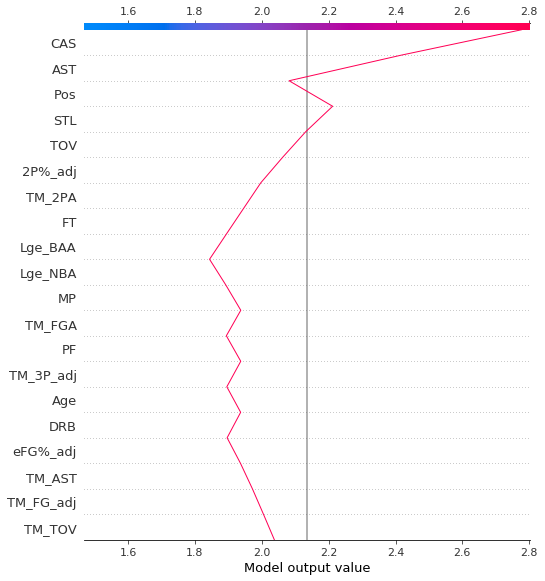

In [17]:
import shap

shap.decision_plot(model.intercept_, model.coef_, X_test_encoded.columns)

In [ ]:
import numpy as np
from IPython.display import clear_output
import timeit
start = timeit.default_timer()

shaps = []
columns = X_train_encoded.columns

for i in range(len(X_train_encoded)):
    clear_output(wait=True)
    shap_values = []
    for j in range(len(columns)):
        shap_value = X_train_encoded.iloc[i, j] * model.coef_[j]
        shap_values.append(shap_value)
    shaps.append(shap_values)
    
    stop = timeit.default_timer()
    
    if (i/len(X_train_encoded)*100) < 5:
        expected_time = 'Calculating...'
    else:
        time_perc = timeit.default_timer()
        expected_time = np.round(((time_perc-start) / (i/len(X_train_encoded))) / 60, 2)
        
    print('Current progress:', np.round(i/len(X_train_encoded) * 100, 2), '%')
    print('Currenct runtime:', np.round((stop - start) / 60, 2), 'minutes')
    print('Expected runtime:', expected_time, 'minutes')
    
shaps

Current progress: 77.75 %
Currenct runtime: 2.29 minutes
